In [1]:
import foolbox
import keras
import numpy as np
from keras.applications.resnet50 import ResNet50

keras.backend.set_learning_phase(0)
kmodel = ResNet50(weights='imagenet')
preprocessing = (np.array([104, 116, 123]), 1)
fmodel = foolbox.models.KerasModel(kmodel, bounds=(0, 255), preprocessing=preprocessing)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
image, label = foolbox.utils.imagenet_example()

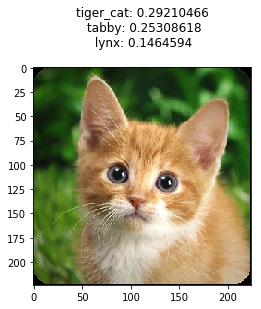

In [4]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

preds = kmodel.predict(preprocess_input(np.expand_dims(image.copy(), axis=0)))
name = decode_predictions(preds, top=3)[0]
name = ' '.join(['%s: %s\n' % (n[1], n[2]) for n in name])

plt.imshow(image / 255)
plt.title(name)

## LBFGSAttack
Pedro Tabacof, Eduardo Valle

[Exploring the Space of Adversarial Images](https://arxiv.org/abs/1510.05328)


## FGSM
Ian J. Goodfellow, Jonathon Shlens, Christian Szegedy

[Explaining and Harnessing Adversarial Examples](https://arxiv.org/abs/1412.6572)

## LinfinityBasicIterativeAttack
Alexey Kurakin, Ian Goodfellow, Samy Bengio

[Adversarial examples in the physical world](https://arxiv.org/abs/1607.02533)

## SaliencyMapAttack
Nicolas Papernot, Patrick McDaniel, Somesh Jha, Matt Fredrikson, Z. Berkay Celik, Ananthram Swami

[The Limitations of Deep Learning in Adversarial Settings”](https://arxiv.org/abs/1511.07528)


## DeepFoolAttack
Seyed-Mohsen Moosavi-Dezfooli, Alhussein Fawzi, Pascal Frossard

[DeepFool: a simple and accurate method to fool deep neural networks](https://arxiv.org/abs/1511.04599)

In [5]:
LBFGS = foolbox.attacks.LBFGSAttack(fmodel)
FGSM = foolbox.attacks.FGSM(fmodel)
SaliencyMap = foolbox.attacks.SaliencyMapAttack(fmodel)
DeepFool = foolbox.attacks.DeepFoolAttack(fmodel)

In [6]:
adversarials = []

adversarials.append(LBFGS(image[:, :, ::-1], label))
adversarials.append(FGSM(image[:, :, ::-1], label))
adversarials.append(SaliencyMap(image[:, :, ::-1], label))
adversarials.append(DeepFool(image[:, :, ::-1], label))

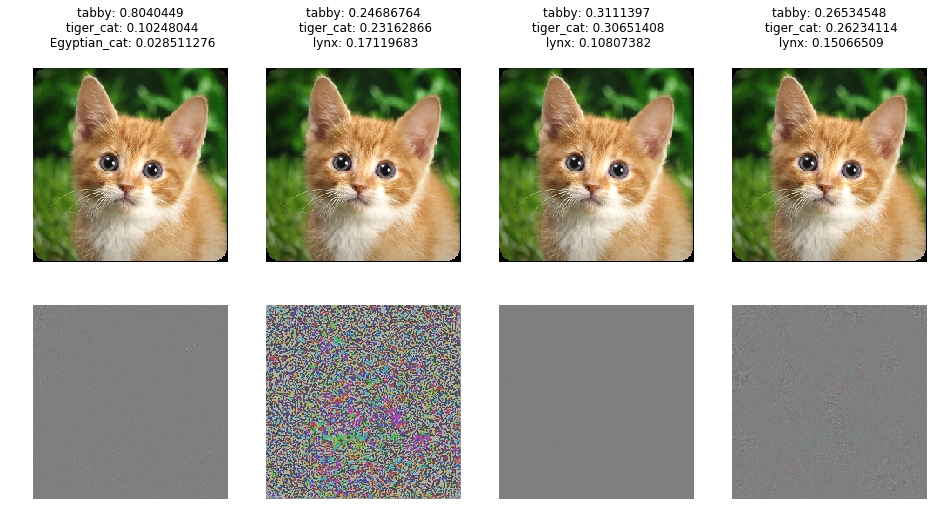

In [7]:
plt.figure(figsize = (16, 8))

for i, adversarial in enumerate(adversarials):
    adversarial_rgb = adversarial[:, :, ::-1]
    preds = kmodel.predict(preprocess_input(np.expand_dims(adversarial_rgb.copy(), axis=0)))
    name = decode_predictions(preds, top=3)[0]
    name = ' '.join(['%s: %s\n' % (n[1], n[2]) for n in name])
    
    plt.subplot(2, 4, i+1)
    plt.imshow(adversarial_rgb / 255)
    plt.title(name)
    plt.axis('off')
    
    plt.subplot(2, 4, i+5)
    difference = adversarial_rgb - image
    plt.imshow(difference / abs(difference).max() * 0.2 + 0.5)
    plt.axis('off')

plt.savefig('docs/example.jpg')